In [203]:
import numpy as np
import matplotlib.pyplot as plt

In [204]:
import os
import shutil
import time

# Plot Space average of u(t)

Text(0.5, 1.0, '')

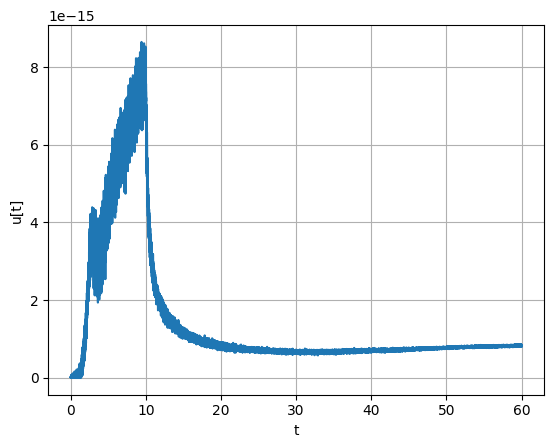

In [205]:
f = open("../fileAveout.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    a, b = row.split(" ")
    x[i] = float(a)
    y[i] = float(b)
    i = i + 1
plt.semilogy(x[0:i], np.abs(y[0:i]))

plt.xlabel("t")
plt.ylabel("u[t]")
plt.yscale("linear")
plt.grid()
plt.title("")

# Plot final state u(x, tmax)

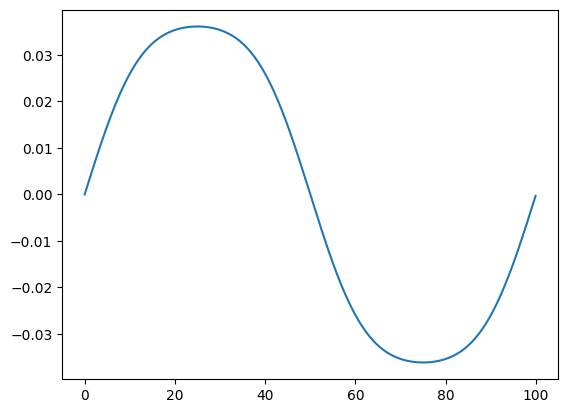

In [206]:
f = open("../tdgl_result.dat", "r")
N = 1000000000
x = np.zeros(N)
y = np.zeros(N)
i = 0
for row in f:
    if i != 0:
        a, b = row.split(" ")
        #a, b = row.split("	")
        x[i-1] = float(a)
        y[i-1] = float(b)
    else:
        N, tmax, dx, dt, seed, A, Thalf, Cave = row.split(" ")
        N = int(N)

    i = i + 1

x = x[0:i-1]
y = y[0:i-1]

# For numerical solution
#x = (x + 4*np.ones(N))/8*100
#y = -y

T = 2*float(Thalf)

#eps = 0.5

fig, ax = plt.subplots()
ax.plot(x[0:i-1], y[0:i-1])
#plt.ylim(-1-eps,1+eps)

label = ""
#u0 = 1
#label = label + "$u_0 = " + str(u0) + "$"
label= label + "\ndt = " + str(dt)
if T > 0:
    label = label + "\nC(t) = " + Cave + " + " + A + "$\sin{2\pi t/" + str(T) + "}$"
else:
    label = label + "\nC = " + Cave
state_time = float(tmax) - 10
label = label + "\n t = " + str(state_time)
#label = "dt = " + str(dt) 
#if float(T) > 0:
#label = label + "; T = " + str(T) + "; A = " + str(A)
#else:
#label = label + "; C = " + str(A) + " cost"

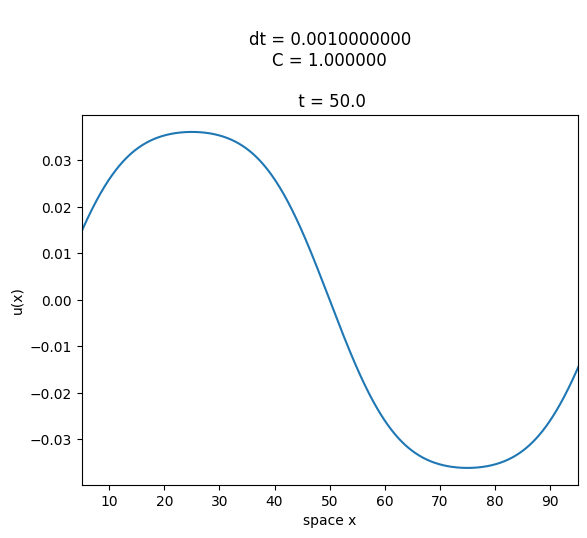

In [207]:
ax.set_title(label)
ax.set_xlabel("space x")
ax.set_ylabel("u(x)")
eps = 0.5
#ax.set_ylim(-np.sqrt(float(Cave))-eps,np.sqrt(float(Cave))+eps)
ax.set_xlim(5,95)

#ax.plot(np.linspace(0,100,5), np.zeros(5), linestyle = "dashed", color = "black")
#ax.set_axis_off()
fig
#plt.grid()

# Tail shape

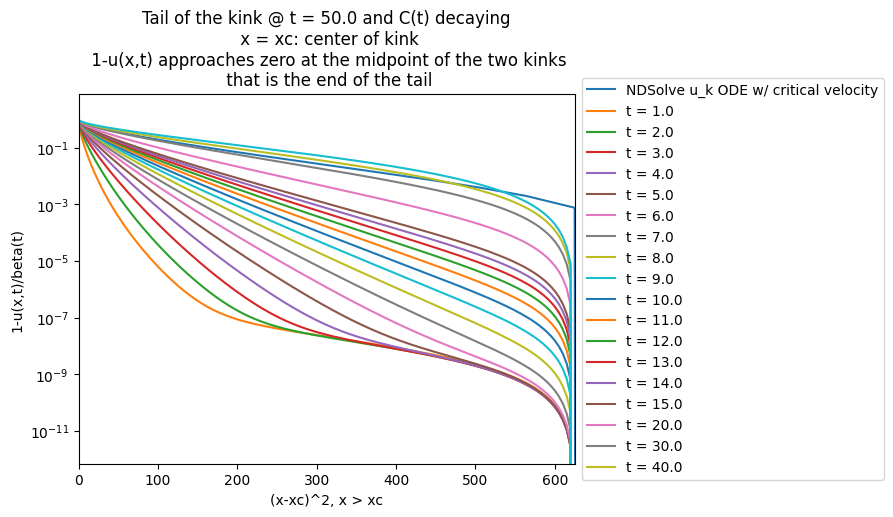

In [208]:
# Check kink's tail shape

#fig_, ax_ = plt.subplots()
ax_.set_xlabel("(x-xc)^2, x > xc")
ax_.set_ylabel("1-u(x,t)/beta(t)")
ax_.set_title("Tail of the kink @ t = "+str(state_time)+" and C(t) decaying\n x = xc: center of kink\n 1-u(x,t) approaches zero at the midpoint of the two kinks\n that is the end of the tail")

N = int(N)
beta = y[N-int(N/4)]
x2 = np.zeros(N)
for i in np.arange(0,N):
    x2[i] = np.sign(x[i]-x[int(N/2)])*(x[i]-x[int(N/2)])**2

curve_label = "t = " + str(state_time)
#curve_label = "NDSolve u_k ODE w/ critical velocity"
ax_.plot(x2[0:i-1], (np.ones(N-2)-y[0:i-1]/beta), label = curve_label)
ax_.set_yscale("log")

xc = 0
width = 3
plotlenght = 22

ax_.set_xlim((xc)**2,(xc+width+plotlenght)**2)
#ax_.legend(loc="bottom left")
#plt.ylim(10**(-3),10**(-1))
fig_

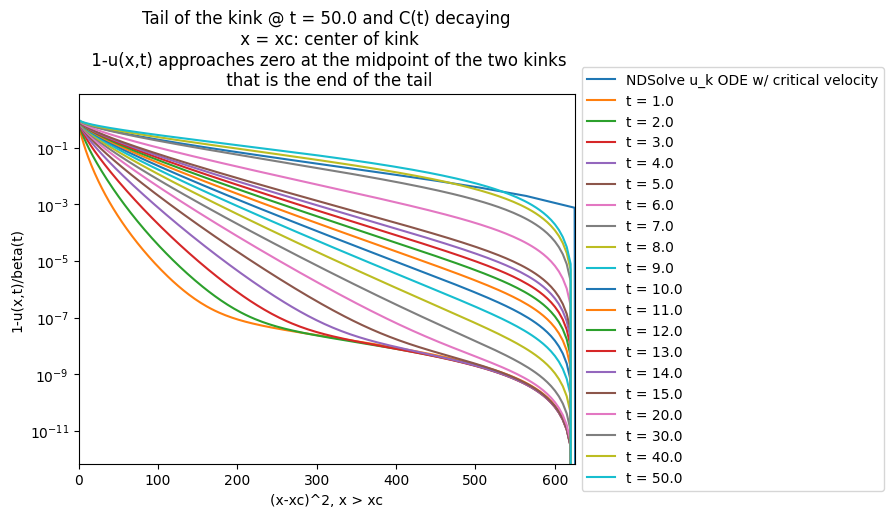

In [209]:
ax_.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig_

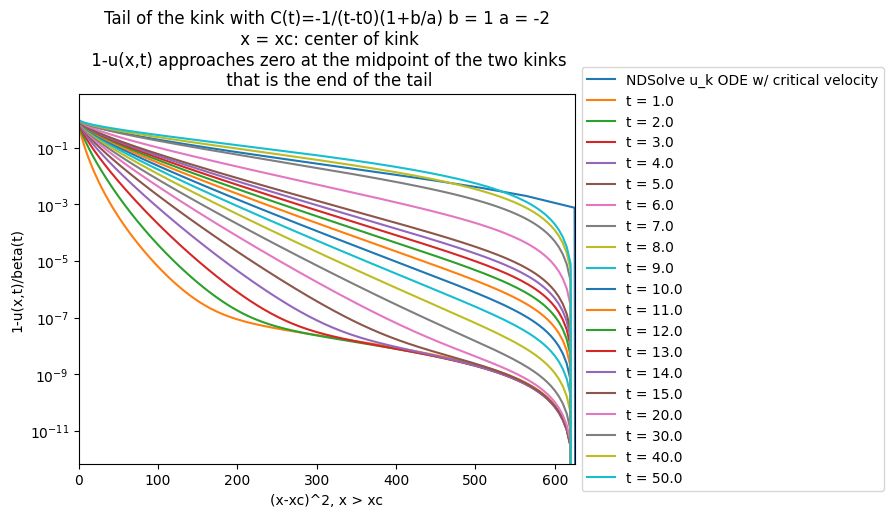

In [211]:
ax_.set_title("Tail of the kink with C(t)=-1/(t-t0)(1+b/a) b = 1 a = -2\n x = xc: center of kink\n 1-u(x,t) approaches zero at the midpoint of the two kinks\n that is the end of the tail")
fig_

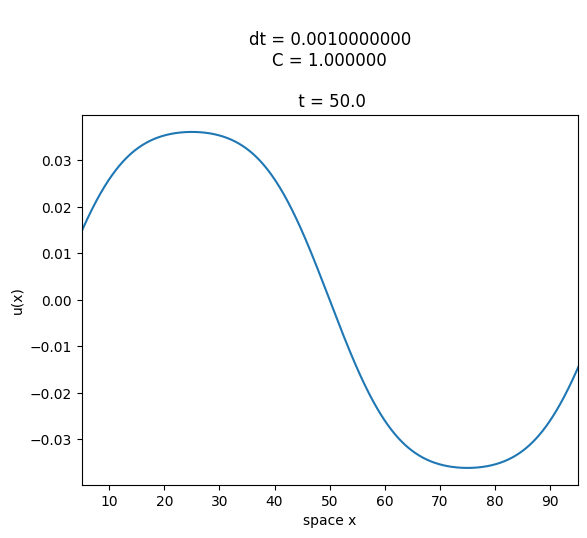

In [210]:
fig